In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import pandas as pd
import dateutil
import datetime
import numpy as np
import xarray as xr
import re
import pickle
import math
import importlib
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as pltticker
import pdb


print(np.__version__)
print(pd.__version__)
print(xr.__version__)


1.15.4
0.20.3
0.10.8


In [92]:
from StrategyModule import *
from StrategyUtils import *
from StrategyModuleSpecific import *

importlib.reload(Strategy)
importlib.reload()
importlib.reload(ss)


<module 'StrategyModuleSpecific' from 'C:\\dev\\arpeggioQI\\arpeggioOne\\arpeggioOne\\StrategyModuleSpecific.py'>

## Standard Processes

C:\dev\arpeggioQI\arpeggioOne\arpeggioOne\StrategyUtils.py:499: RuntimeWarning: invalid value encountered in less_equal
  wgt[sig <= MethodParam] = -1
C:\dev\arpeggioQI\arpeggioOne\arpeggioOne\StrategyUtils.py:500: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(sig, axis=1, keepdims=True) - MethodParam + 1
C:\dev\arpeggioQI\arpeggioOne\arpeggioOne\StrategyUtils.py:501: RuntimeWarning: invalid value encountered in greater_equal
  wgt[sig >= smax] = 1
C:\dev\arpeggioQI\arpeggioOne\arpeggioOne\StrategyUtils.py:526: RuntimeWarning: Mean of empty slice
  wgt = wgt - np.nanmean(wgt, axis=1, keepdims=1)


                       StrategyReturn  StrategyReturnCompare
StrategyReturn               1.000000               0.400954
StrategyReturnCompare        0.400954               1.000000


C:\WinPython\python-3.5.4.amd64\lib\site-packages\xarray\core\computation.py:560: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)


TODO: use parent implementation instead


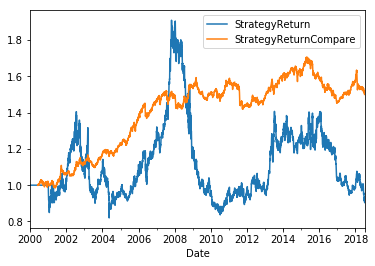

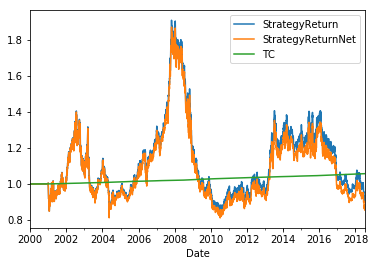

In [93]:
## process for single strategy
#s = sm.Strategy.StrategyFactory('DBPPPUSF')
s = sm.Strategy.StrategyFactory('UISET6UE')
s.Load()
s.CalcAll()
s.to_pickle()

In [ ]:
## short cut for all implemented strategies
sm.Strategy.CalcAllImplemented()

In [ ]:
## process for RiskModel
RM = su.RiskModel()
RM.to_pickle()
RM = su.RiskModel.from_pickle("RiskModel")
RM.CalcCov()

In [ ]:
## process for fund
p = sm.Strategy.StrategyFactory('Fund')
p.Load()
p.CalcAll()
p.to_pickle()

In [ ]:
## powerbi->sql server view->web api process
p = sm.Strategy.from_pickle('Fund')
res = p.GetTimeSeries('VolContribution')
res[0].to_pandas().plot()

In [ ]:
S = p.LoadSubStrategies()

In [ ]:
RES = [s.attrs["Risk"]["Corr_Strat_ID"] for s in S] + [p.attrs["Risk"]["Corr_Fund_ID"]]
RES = xr.concat(RES, pd.Index(p.ID.values.tolist()+['Fund'], name='Strategy'))

In [ ]:
RES

## Value as 5y Reversal, Low Vol, Low Skew

C:\dev\arpeggioQI\arpeggioOne\arpeggioOne\StrategyUtils.py:499: RuntimeWarning: invalid value encountered in less_equal
  wgt[sig <= MethodParam] = -1
C:\dev\arpeggioQI\arpeggioOne\arpeggioOne\StrategyUtils.py:500: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(sig, axis=1, keepdims=True) - MethodParam + 1
C:\dev\arpeggioQI\arpeggioOne\arpeggioOne\StrategyUtils.py:501: RuntimeWarning: invalid value encountered in greater_equal
  wgt[sig >= smax] = 1
C:\dev\arpeggioQI\arpeggioOne\arpeggioOne\StrategyUtils.py:526: RuntimeWarning: Mean of empty slice
  wgt = wgt - np.nanmean(wgt, axis=1, keepdims=1)


                       StrategyReturn  StrategyReturnCompare
StrategyReturn               1.000000              -0.306464
StrategyReturnCompare       -0.306464               1.000000


C:\WinPython\python-3.5.4.amd64\lib\site-packages\xarray\core\computation.py:560: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)


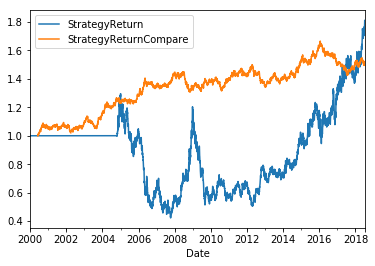

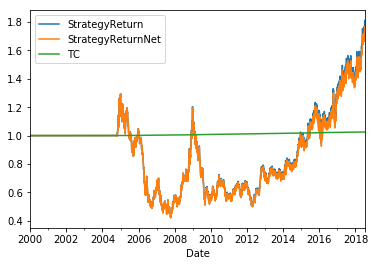

In [83]:
s = sm.Strategy.StrategyFactory('UISKT6UE')
s.Load()
s.Params["GenerateSignals"]["Lookback"] = 5*250
s.Params["GenerateSignals"]["LookbackExclude"] = 0
s.Params["GenerateSignals"]["TechnicalSignal"] = "Reversal"
s.Params["ConstructWeights"]["CSorTS"] = 1

s.CalcAll()

C:\dev\arpeggioQI\arpeggioOne\arpeggioOne\StrategyUtils.py:499: RuntimeWarning: invalid value encountered in less_equal
  wgt[sig <= MethodParam] = -1
C:\dev\arpeggioQI\arpeggioOne\arpeggioOne\StrategyUtils.py:500: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(sig, axis=1, keepdims=True) - MethodParam + 1
C:\dev\arpeggioQI\arpeggioOne\arpeggioOne\StrategyUtils.py:501: RuntimeWarning: invalid value encountered in greater_equal
  wgt[sig >= smax] = 1
C:\dev\arpeggioQI\arpeggioOne\arpeggioOne\StrategyUtils.py:526: RuntimeWarning: Mean of empty slice
  wgt = wgt - np.nanmean(wgt, axis=1, keepdims=1)


                       StrategyReturn  StrategyReturnCompare
StrategyReturn                1.00000                0.07865
StrategyReturnCompare         0.07865                1.00000


C:\WinPython\python-3.5.4.amd64\lib\site-packages\xarray\core\computation.py:560: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)


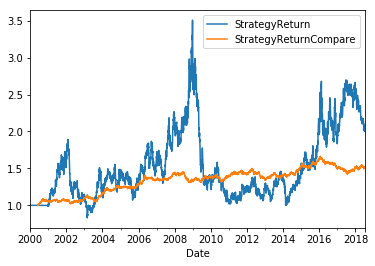

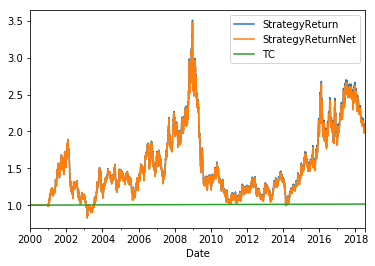

In [84]:
s = sm.Strategy.StrategyFactory('UISKT6UE')
s.Load()
s.Params["GenerateSignals"]["Lookback"] = 250
s.Params["GenerateSignals"]["TechnicalSignal"] = "LowVol"
s.Params["ConstructWeights"]["CSorTS"] = 1

s.CalcAll()

C:\dev\arpeggioQI\arpeggioOne\arpeggioOne\StrategyModule.py:701: RuntimeWarning: invalid value encountered in sign
  wgt = np.sign(sig)/len(x.ID)


                       StrategyReturn  StrategyReturnCompare
StrategyReturn               1.000000               0.718594
StrategyReturnCompare        0.718594               1.000000


C:\WinPython\python-3.5.4.amd64\lib\site-packages\xarray\core\computation.py:560: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)


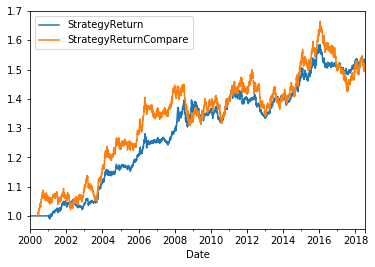

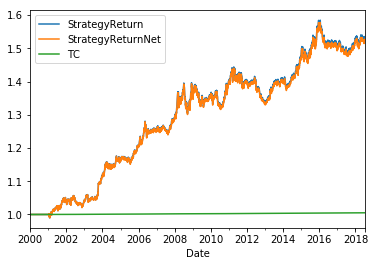

In [89]:
s = sm.Strategy.StrategyFactory('UISKT6UE')
s.Load()

s.Params["GenerateSignals"]["Lookback"] = 250
s.Params["GenerateSignals"]["TechnicalSignal"] = "Momentum"
s.Params["ConstructWeights"]["CSorTS"] = 0
s.Params["ConstructWeights"]["VolTargetAssetsLookback"] = 250

s.CalcAll()

<xarray.DataArray 'Return' (Date: 4834, ID: 29)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [-0.002144,  0.007423, -0.053946, ...,       nan,       nan,       nan],
       [ 0.020212, -0.006316,  0.007392, ..., -0.005637, -0.030758, -0.02852 ],
       ...,
       [-0.002173,  0.023741,  0.000877, ..., -0.003334, -0.003222, -0.008553],
       [-0.023955, -0.008397, -0.010517, ..., -0.008762, -0.016784, -0.013236],
       [-0.004462,  0.002016, -0.018601, ...,  0.001768,  0.010116,  0.013653]])
Coordinates:
  * Date     (Date) datetime64[ns] 2000-01-03 2000-01-04 2000-01-05 ...
  * ID       (ID) object 'KC' 'CC' 'SB' 'C' 'LC' 'S' 'FC' 'LH' 'CT' 'KW' 'W' ...

## UBS Trend = TS + 6% Vol Target

In [ ]:
s = sm.Strategy.StrategyFactory('UISKT6UE')
s.Load()
s.Params["ConstructWeights"]["CSorTS"] = 0
s.CalcAll()

In [ ]:
svt_params = sm.StrategyParams({
    'Enabled': True, 
    'VolTarget': 0.25, 
    'LeverageLimit': 1.,
    'ImplementationLag': 2})

s.Params["VolTargeting"] = svt_params

s.VolTargeting()
s.CalcPerformance()
s.PlotPerformance()

In [ ]:
y = su.xr_concat([s.StrategyReturn, s.StrategyReturnCompare * 6])
su.r2p(y).plot()

su.SharpeRatio(y)


## risk related ...  not sure

In [ ]:
class ininin:
  def LoadSubStrategies(self):
    S = [sm.Strategy.from_pickle(sm.Strategy.DisplayNames2StrategyNames[s]) for s in p.ID.values]
    return S

  def PreCalcRisk(p):
    # get risk model
    RM = su.RiskModel.from_pickle("RiskModel")
    RM.CalcCov()
    
    # load sub strategies
    S = p.LoadSubStrategies();

    # calc W of ID in Fund
    W_Strat_IDs = [s.Weight * p.Weight[:, iS] for iS, s in enumerate(S)]
    W_Strat_ID = xr.concat(W_Strat_IDs, pd.Index(p.ID.values, name="Strategy"))
    W_ID = W_Strat_ID.sum(dim='Strategy')
    W = W_ID

    # transpose W
    W2 = xr.DataArray(W, dims=('Date', 'ID2'), coords=[W.Date, W.ID]) 

    # corr of ID to Fund
    Cov_Fund_ID = (W2 * RM.Cov).sum(dim='ID2')
    Vol_Fund = (W * RM.Cov * W2).sum(dim=['ID', 'ID2'])**0.5
    Corr_Fund_ID = Cov_Fund_ID / RM.Vol / Vol_Fund
    Vol_ID = RM.Vol
    
    # contrib by ID
    VolContrib_ID = Corr_Fund_ID * Vol_ID * W_ID
    
    R = {
        'Cov_Fund_ID': Cov_Fund_ID,
        'Vol_Fund': Vol_Fund,
        'Corr_Fund_ID': Corr_Fund_ID,
        'Vol_ID': Vol_ID,
        'W_ID': W_ID,
        'VolContrib_ID': VolContrib_ID,
        'W_Strategy_IDs': W_Strat_IDs
        }
    
    p.attrs["Risk"] = sm.StrategyParams(R)
    
  def CalcRiskItem(p, Item):
    # contrib by Strat by ID
    W_Strat_IDs
    VolContrib_Strat_IDs = [R.Corr_Fund_ID * R.Vol_ID * s for s in R.W_Strat_IDs]

    # Return contrib
    ReturnContrib_Strat_IDs = [S[iS].ReturnContribution * p.Weight[:, iS] for iS, s in enumerate(S)]
    ReturnContrib_Strat_ID_Cums = [su.r2p(s) for s in ReturnContrib_Strat_IDs]
  
def CalcCorr(p):
  with su.Timer(1):
    RM = su.RiskModel.from_pickle("RiskModel")
    RM.CalcCov()
    
  with su.Timer(2):
    # collect strategies in fund
    S = [sm.Strategy.from_pickle(sm.Strategy.DisplayNames2StrategyNames[s]) for s in p.ID.values]
    
  with su.Timer(3):
    # calc W of ID in Fund
    W_Strat_IDs = [s.Weight * p.Weight[:, iS] for iS, s in enumerate(S)]
    W_Strat_ID = xr.concat(W_Strat_IDs, pd.Index(p.ID.values, name="Strategy"))
    W_ID = W_Strat_ID.sum(dim='Strategy')
    W = W_ID
    
  with su.Timer(4):
    # transpose W
    W2 = xr.DataArray(W, dims=('Date', 'ID2'), coords=[W.Date, W.ID]) 

    # corr of ID to Fund
    Cov_Fund_ID = (W2 * RM.Cov).sum(dim='ID2')
    Vol_Fund = (W * RM.Cov * W2).sum(dim=['ID', 'ID2'])**0.5
    Corr_Fund_ID = Cov_Fund_ID / RM.Vol / Vol_Fund
    Vol_ID = RM.Vol
    
    # contrib by ID
    VolContrib_ID = Corr_Fund_ID * Vol_ID * W_ID
    
  with su.Timer(4):
    R = {
        'Cov_Fund_ID': Cov_Fund_ID,
        'Vol_Fund': Vol_Fund,
        'Corr_Fund_ID': Corr_Fund_ID,
        'Vol_ID': Vol_ID,
        'W_ID': W_ID,
        'VolContrib_ID': VolContrib_ID,
        }
    
    
  with su.Timer(5):

    # contrib by Strat by ID
    VolContrib_Strat_IDs = [Corr_Fund_ID * Vol_ID * s for s in W_Strat_IDs]

    # Return contrib
    ReturnContrib_Strat_IDs = [S[iS].ReturnContribution * p.Weight[:, iS] for iS, s in enumerate(S)]
    ReturnContrib_Strat_ID_Cums = [su.r2p(s) for s in ReturnContrib_Strat_IDs]
  
  

  return R

In [ ]:
R = CalcCorr(p)

In [ ]:
R["Corr_Strat_ID"]

In [ ]:
p.attrs["Risk"] = R

In [ ]:
p.to_pickle()

In [ ]:
R.VolContrib_ID.sum('ID').to_pandas().plot()
R.Vol_Fund.to_pandas().plot()

In [ ]:
p = sm.Strategy.from_pickle('Fund')

In [ ]:
#Cov_Fund_ID.name = 'Cov_Fund_ID'


Cov_Fund_ID.rename('Cov_Fund_ID')

In [ ]:
xr.merge({
    "Cov_Fund_ID": Cov_Fund_ID,
    "Vol_Fund": Vol_Fund,
    "Corr_Fund_ID": Corr_Fund_ID
    })

In [ ]:
COR[-1, :].to_pandas().plot.bar()

In [ ]:
# Vol contrib
W = W_ID
W2 = xr.DataArray(W, dims=('Date', 'ID2'), coords=[W.Date, W.ID])
((W * RM.Cov * W2).sum(dim=['ID', 'ID2'])**0.5).to_pandas().plot()
(p.StrategyReturn.rolling(Date=250).std()*math.sqrt(250)).to_pandas().plot()


# Corr
(W * RM.Cov).sum(dim='ID')


# Wgt

In [ ]:
RM.Return[:, 0].rolling(Date=250).std()*math.sqrt(250)


In [ ]:
(W * RM.Cov * W2).sum(dim=['ID', 'ID2']).to_pandas().plot()

In [ ]:
s = sm.Strategy.StrategyFactory("RiskModel")
s.Load()
s.DataCleaning()

## Different Plots

In [ ]:
import mpld3
df, r = su.ScatterPlotGrid.Prepare(
        s, 
        Freq=20, 
        Items=["StrategyReturnCum", "Intensity", "CorrCrowding", "SignalDuration"], 
        Regime="Intensity",
        QuantileBuckets=3)

In [ ]:
sns.set(style="white")
g = sns.PairGrid(df, diag_sharey=False)

gl = g.map_lower(sns.kdeplot)
gu = g.map_upper(sns.scatterplot)
gd = g.map_diag(sns.kdeplot)

df = df.iloc[:, :2]
labels = df.columns
ax = gd.axes
cX = len(labels)

for i in range(cX):
  ax[0, i].set_title(labels[i])

[a.set_xlabel("") for a in ax.flat]
[a.set_ylabel("") for a in ax.flat]

mpld3.save_html(plt.gcf(), 'sns.html')
mpld3.save_json(plt.gcf(), 'sns.json')

aax = plt.gcf().get_axes()

In [ ]:
su.ScatterPlotGrid.LinkedBrush(df, r)
mpld3.display()

In [ ]:
from scipy import stats

fig, ax = plt.subplots()

data = s.Intensity.values
kde = stats.gaussian_kde(data)
x = np.linspace(data.min(), data.max(), 100)
p = kde(x)

plt.bar(bins[:-1]+widths[0]/2, hist, widths);
plt.plot(x, p)
plt.plot(x, p)
plt.show()



import mpld3
figJSON = mpld3.fig_to_dict(fig)
figHTML = mpld3.fig_to_html(fig)

mpld3.save_html(fig, 'test.html')

In [ ]:
figJSON

In [ ]:
a = plt.hist(s.Intensity.to_pandas(), 20)
a[2]

plt.hist??

In [ ]:
H.Count, H.Bin, ~ = plt.hist(s.Intensity.to_pandas(), 20)
if H.Bin[0] < 0:
    H.Bin0 = max(abs(H.Bin[0]), H.Bin[-1]);
    H.Bin = np.linspace(-H.Bin0, H.Bin0, 20);
    [H.Count, H.Bin] = plt.hist(s.Intensity.to_pandas(), H.Bin)

## Vol Targeting and Stop Loss

In [ ]:
s = sm.Strategy.from_pickle('UISET6UE')
S = s.Example_VolTargeting_StopLoss()


In [ ]:
y = su.xr_concat([s.StrategyReturn for s in S])
y.columns = ["Original", "Vol-Target", "Stop-Loss", "Both"]
su.SharpeRatio(y)

## Backtest Params Universe

In [ ]:
s = sm.Strategy.from_pickle('DBPPPUSF')

In [ ]:
[INCL, LABEL] = s.BacktestParam_Includes('random', .3, 10),

prms = [
    {'Group': 'DataCleaning',
     'Param': 'IncludeOverride',
     'Values': list(range(1, 5)) + list(range(5, 60, 5))},
    {'Group': 'ConstructWeights',
     'Param': 'SmoothRebalance',
     'Values': list(range(1, 5)) + list(range(5, 60, 5))}]


res = s.BacktestParamsX(prms, plot=True)
sr = su.SharpeRatio(res)

In [ ]:
s = sm.Strategy.from_pickle('DBMOMUSF')

prms = [{'Group': 'ConstructWeights', 'Param': 'SmoothRebalance', 'Values': [1, 2, 3, 4]}, 
        {'Group': 'DataCleaning', 'Param': 'IncludeOverride', 'Values': 's.BacktestParam_Includes("leave1out")'}
       ]


prms[1]["Values"] = eval(prms[1]["Values"])


res = s.BacktestParamsX(prms, plot=False)






## PBO in sample out of sample

In [ ]:
import sys
sys.path.append('C:/Dev/Python/pypbo/')

import math

import pypbo as pbo
import pypbo.perf as perf


def metric(x):
    return np.sqrt(255) * perf.sharpe_iid(x)

pbox = pbo.pbo(res, S=8,
   metric_func=metric, threshold=1, n_jobs=1,
   plot=True, verbose=True, hist=True)


In [ ]:
class Sample():
    # follow lopez de prado's 
    # combinatorically-symmetric cross-validation
    # omega and logit definition

    f_perf = lambda x: x.mean(axis=0)/x.std(axis=0)*np.sqrt(250)
    
    def __init__(self, ret, ind=None):
        
        cDates, cTrails = ret.shape
        if ind is None:
            #randomly choose dates
            self.ind = np.random.choice(cDates, cDates//2, replace=False)
        else:
            self.ind = ind

        self.perf = Sample.f_perf(ret[self.ind, :])
        self.rank = su.np_rank01(self.perf).reshape(-1)

    def get_oos(self, ret):
        cDates = ret.shape[0]
        oos = Sample(
            ret, 
            list(set(range(0, cDates))-set(self.ind))
          )
        return oos
    
    def get_lambda(self, oos, q=0.1):
        if True:
            iTop = self.rank > 1-q
        else:
            iTop = self.rank.argmax()
        
        omega = oos.rank[iTop].mean()
        
        lam = np.log(omega/(1-omega))
                     
        return [lam, omega, self.perf[iTop].mean(), oos.perf[iTop].mean()]

In [ ]:
def bbbb(res, cBoot=20):
    res = res.reshape(res.shape[0], -1)
    cDates, cTrails = res.shape

    lam = np.full([cBoot, 2, 4], np.nan)

    INS = []
    OOS = []

    with su.Timer():
        for iB in range(0, cBoot):
            ins = Sample(res)
            oos = ins.get_oos(res)

            INS.append(ins)
            OOS.append(oos)

            lam[iB, 0, :] = ins.get_lambda(oos, 0.1)
            lam[iB, 1, :] = oos.get_lambda(ins, 0.1)


    rrr = pd.concat(
        [pd.DataFrame(lam[:, 0, :], columns=['Lam', 'Omega', 'SRins', 'SRoos']),
        pd.DataFrame(lam[:, 1, :], columns=['Lam', 'Omega', 'SRins', 'SRoos'])],
        axis=0)
    
    return rrr, INS + OOS

In [ ]:
rrr, SAM = bbbb(res, 70)

In [ ]:
a = np.concatenate([sam.perf for sam in SAM], axis=0)
ar = su.np_rank01(a)[:, 0]
df = pd.DataFrame(ar, a)
df = df.sort_index()

df2 = pd.DataFrame(su.np_rank01(rrr.SRoos.values)[:, 0], rrr.SRoos.values)
df2 = df2.sort_index()


plt.plot(df.index, df.values)
plt.plot(df2.index, df2.values)
plt.show()





In [ ]:
plt.hist(rrr.Lam, 50);

In [ ]:
plt.scatter(rrr.SRins, rrr.SRoos);

import statsmodels.api as sm
#sm.add_constant()
#In [4]: spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

# Fit and summarize OLS model
mod = sm.OLS(rrr.SRoos, sm.add_constant(rrr.SRins))

modres = mod.fit()

print(modres.summary())

In [ ]:
def aaaa(ret):
    f_perf = lambda x: x.mean(axis=0)/x.std(axis=0)*np.sqrt(250)


    lam = np.full([cBoot, 2], np.nan)

    with su.Timer():
        for iB in range(0, cBoot):
            ins_ind = np.random.choice(cDate, cDate//2, replace=False)
            ins_perf = f_perf(ret[ins_ind, :])
            #ins_perf = ret[ins_ind, :].mean(axis=0)/ret[ins_ind, :].std(axis=0)
            ins_rank = su.np_rank01(ins_perf).reshape(-1)

            oos_ind = list(set(range(0, cDate))-set(self.ind))
            oos_perf = f_perf(ret[oos_ind, :])
            #oos_perf = ret[oos_ind, :].mean(axis=0)/ret[oos_ind, :].std(axis=0)
            oos_rank = su.np_rank01(oos_perf).reshape(-1)

            ins_top = ins_rank.argmax()
            oos_top = oos_rank.argmax()

            omega = np.array([oos_rank[ins_top], ins_rank[oos_top] ])

            lam[iB, :] = np.log(omega/(1-omega))





## Precalc Event Paths for some Regimes

In [ ]:
StrategyNames = ['DBPPPUSF', 'DBHVG10U', 'DBMOMUSF', 'SGICCMX']
Regimes = ["VolCrowding", "CorrCrowding", "Crowding", "Intensity", "TurnoverAnn", "VolExante",
    'SignalAverage', 'SignalDispersion', 'SignalDuration',
    'VolAverage', 'VolDispersion']


In [ ]:
s = sm.Strategy.from_pickle(StrategyNames[0])


In [ ]:
Regime = su.EventPath.PrepRegime(s.CorrCrowding, 5)
mPaths, sPaths, allPaths = su.EventPath.EventPaths(s.StrategyReturn.to_pandas(), Regime, off=90, plot=False)
res = su.EventPath.Plotd3(mPaths, sPaths, True)

In [ ]:
fig, ax = plt.subplots()
s.CalcPayoffProfile()
mpld3.fig_to_dict(fig)

In [ ]:
s = sm.Strategy.from_pickle('DBMOMUSF')
prms = [
    {'Group': "GenerateSignals", 
    'Param': "Lookback", 
    'Values': list(range(50, 500, 50))},

    {'Group': "GenerateSignals", 
    'Param': "LookbackExclude", 
    'Values': list(range(0, 40, 5))}
]

fig, ax = plt.subplots()
res = s.BacktestParamsX(prms, plot=True)
mpld3.fig_to_dict(fig)